# Files Practice

Read in the text file 'Pizza_File.txt'  and find the number of times the letter a (upper or lower case) appears. Also compute the average number of slices consumed.

In [1]:
#Write you code here
f = open("Data/Pizza_File.txt", "r")
lines = f.readlines()
sentence = lines[0]
pizza_consumption = lines[1]

#First part
num_a = sentence.lower().count("a")
print("Jake ate " + str(num_a) + " pizza slices")

#Second part
pizza_list = pizza_consumption.split(",")
int_slices = []
for slice_ in pizza_list:
    int_slices.append(int(slice_))
avg = sum(int_slices)/len(int_slices)
print("The avg slices was " + str(avg))

Jake ate 7 pizza slices
The avg slices was 6.166666666666667


Read in the text file 'scores.txt' and create a dictionary where the keys are the names and the values are lists of scores

In [2]:
#Write your code here
f = open("Data/scores.txt")
lines = f.readlines()
D_scores = {}
for line in lines:
    info = line.strip("\n").split(",")
    name = info[0]
    scores_str = info[1:]
    scores_int = []
    for score in scores_str:
        scores_int.append(int(score))
    D_scores[name] = scores_int
    
D_scores

{'Amr': [0, 1, 2, 3, 4, 5],
 'Dennis': [101, 99, 101, 99],
 'Jake': [100, 100, 100, 101, 99]}

Read in the file 'user_likes.txt' and create a dictionary where the keys are the movies and the values are the fraction of times this movie was liked.

In [3]:
#Write your code here
f = open("Data/user_likes.txt")
lines = f.readlines()[:-2]
D_ratings = {}
for line in lines:
    info = line.strip("\n").split(",")
    movie = info[1]
    score = int(info[2])
    if movie in D_ratings.keys():
        D_ratings[movie].append(score)
    else:
        D_ratings[movie] = [score]
D_avg = {}
for movie in D_ratings:
    D_avg[movie] = sum(D_ratings[movie])/len(D_ratings[movie])
D_avg

{'La La Land': 1.0,
 'Rogue One': 1.0,
 'Suicide Squad': 0.4,
 'The Great Wall': 0.5}

## Stock Portfolio

In this exercise, we will simulate 4 strategies that Susan can employ for her finance from 1994 to 2020. For simplicity, let us assume that Susan can only invest in SPY, which is the index that tracks S\&P 500 in US. 


### Set-up 
Let us assume that Susan has a stable job and her investable income every month is 1000 USD. For simplicity, let us assume that Susan can only invest in SPY, which is the index that tracks S\&P 500 in US, or a high yield saving account that pays 0.15\% monthly interest (in other words, if you have 100 USD in the bank, you will get 25 cents in the coming month). The bank interests are compounded every month. 

First, you need to read in the data from data/spy_data.csv, save the open price, close price and month to the follow three lists.

In [21]:
stock_open = []
stock_close = []
month = []
month_rate = 0.001
monthly_cash = 1000

f = open("data/spy_data.csv")

lines = f.readlines()

names = lines[0]

for line in lines[1:]:
    line = line.split(",")
    stock_open.append(float(line[1]))
    stock_close.append(float(line[4]))
    month.append(int(line[-1].strip()))




How much cash does she earb over the years?

In [22]:
len(month) * 1000

322000

### Strategy 1 Not interested in investing

Now, let us assume that Susan does not trust the financial market at all and uses Strategy 1. In this strategy, she will deposit every investable income into a bank every month. In this way, she will deposit 1000 USD to the bank every month and let the interest compound in the bank. 

What you need to do is to simulate this strategy. Let portfolio be a list where each element represents her net asset in the bank in that month. You need to simulate this strategy and see its total net asset in the last month (which is 09/2020). What is her return rate (her total asset at 09/2020 divided by her total cash earned)?


In [23]:
portfolio_1 = [0]

for m in month:
    portfolio_1 += [portfolio_1[-1]*(1+month_rate)+monthly_cash]

portfolio_1[-1], portfolio_1[-1] / (len(month) * 1000)

(379662.7803641705, 1.1790769576527034)

### Strategy 2 Constant Investor

Now, let us assume that Susan constantly invests in the market and does not want to spend too much attend. Therefore, she chooses Strategy 2 where she always invests the earned 1000 dollars in SPY every month. Also let us assume that she has access to fractional shares so that she can buy the fraction of a share depending on the share price (i.e., if the share is 2000 USD, then with 1000 USD, she can buy 0.5 shares). Let us also assume that Susan always buys the shares at the beginning of the month, which means she pays the open price in each month. And her portfolio in that month should be calculated based on the close price in a month.

Now, you should simulate this strategy by generating two lists: shares and portfolio, where shares rerpesent how much shares of SPY she has over months and portfolio is defined above. You should also compute her return rate. 



In [24]:
portfolio_2 = [0]
stocks = [0]

for i in range(len(month)):
    buy = monthly_cash / stock_open[i]
    net_worth = (stocks[-1] + buy) * stock_close[i]
    stocks.append(stocks[-1]+ buy)
    portfolio_2.append(net_worth)

portfolio_2[-1], portfolio_2[-1] / (len(month) * 1000)

(906619.337617431, 2.8155880050230775)

### Strategy 3 Best Market Timer 

Now, let us assume that Susan has a crystal ball that will tell here where is the lowest price in a decade. In other words, she knows the months with lowest price points from 01/1994 (month 1) to 12/2003 (month 120), 01/2004 (month 121) to 12/2013 (month 240), and from 01/2014 (month 241) to 09/2020 (month 322). She will save money at the bank and only jumps in the market with all of her cash in the bank during these three months. For exmaple, if the first lowest point is July 2001, what Susan will do is to save all the money to the bank from Jan 1994 to July 2001 and use all the money in her bank to buy SPY at July 2001. Starting from August 2001 (next month), she will continue saving money until the next lowest price point. 

Now, you should simulate this strategy by generating two lists: shares and portfolio, where shares rerpesent how much shares of SPY she has over months and portfolio is defined above. You should also compute her return rate. 

**Hint:** you may also want a third list called bank which stores the total number of cash in the bank each month. 


In [49]:
portfolio_3 = [0]
stocks_3 = [0]
bank_3 = [0]

lowest_price_index_1 = stock_open[0:120].index(sorted(stock_open[0:120])[1])
lowest_price_index_2 = stock_open[120:240].index(sorted(stock_open[120:240])[1])+120
lowest_price_index_3 = stock_open[240:].index(sorted(stock_open[240:])[1])+240

lowest_month_index = [lowest_price_index_1, lowest_price_index_2, lowest_price_index_3]

for i in range(len(month)):
    if i in lowest_month_index:
        buy = (monthly_cash+bank_3[-1]) / stock_open[i]
        stocks_3.append(stocks_3[-1]+ buy)
        bank_3.append(0)
    else:
        bank_3.append(bank_3[-1]*(1+month_rate)+monthly_cash)
        stocks_3.append(stocks_3[-1])
    
    portfolio_3.append(bank_3[-1]+stocks_3[-1]*stock_close[i])

        
portfolio_3[-1], portfolio_3[-1] / (len(month) * 1000)

(1049879.8303414714, 3.2604963675200973)

### Strategy 4 Worst Market Timer 

Now, let us assume that Susan is the worst market timer ever in the history. Every decade, she only picks the month with the highest stock price to use all of her money in the bank to purchase the stock and otherwise she will save the money in the bank. In other words, she purchases stocks at the months with lowest price points from 01/1994 (month 1) to 12/2003 (month 120), 01/2004 (month 121) to 12/2013 (month 240), and from 01/2014 (month 241) to 09/2020 (month 322). She will save money at the bank and only jumps in the market with all of her cash in the bank during these three months. For exmaple, if the first highest point is July 2001, what Susan will do is to save all the money to the bank from Jan 1994 to July 2001 and use all the money in her bank to buy SPY at July 2001. Starting from August 2001 (next month), she will continue saving money until the next lowest price point. 

Now, you should simulate this strategy by generating two lists: shares and portfolio, where shares rerpesent how much shares of SPY she has over months and portfolio is defined above. You should also compute her return rate. 



In [50]:
portfolio_4 = [0]
stocks_4 = [0]
bank_4 = [0]

highest_price_index_1 = stock_open[0:120].index(sorted(stock_open[0:120])[-1])
highest_price_index_2 = stock_open[120:240].index(sorted(stock_open[120:240])[-1])+120
highest_price_index_3 = stock_open[240:].index(sorted(stock_open[240:])[-1])+240

highest_price_index = [highest_price_index_1, highest_price_index_2, highest_price_index_3]

for i in range(len(month)):
    if i in highest_price_index:
        buy = (monthly_cash+bank_4[-1]) / stock_open[i]
        stocks_4.append(stocks_4[-1]+ buy)
        bank_4.append(0)
    else:
        bank_4.append(bank_4[-1]*(1+month_rate)+monthly_cash)
        stocks_4.append(stocks_4[-1])
    
    portfolio_4.append(bank_4[-1]+stocks_4[-1]*stock_close[i])

        
portfolio_4[-1], portfolio_4[-1] / (len(month) * 1000)

(573147.3345108525, 1.7799606661827716)

The following code plots how the portfolio changes with respect to time. 


What does this teach you?

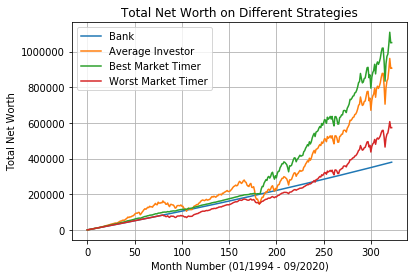

In [57]:
import matplotlib.pyplot as plt

plt.xlabel("Month Number (01/1994 - 09/2020)")
plt.ylabel("Total Net Worth")
plt.title("Total Net Worth on Different Strategies")

plt.plot([0]+month, portfolio_1, label = "Bank")
plt.plot([0]+month, portfolio_2, label = "Average Investor")
plt.plot([0]+month, portfolio_3, label = "Best Market Timer")
plt.plot([0]+month, portfolio_4, label = "Worst Market Timer")

plt.legend()
plt.grid()
plt.show()